In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('loan_train.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.drop(['Loan_ID'], inplace=True, axis=1)

In [14]:
df

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

In [15]:
categoricaldf = df.select_dtypes(include=['object'])
categoricaldf

Gender Married Dependents     Education Self_Employed Property_Area  \
0      Male      No          0      Graduate            No         Urban   
1      Male     Yes          1      Graduate            No         Rural   
2      Male     Yes          0      Graduate           Yes         Urban   
3      Male     Yes          0  Not Graduate            No         Urban   
4      Male      No          0      Graduate            No         Urban   
..      ...     ...        ...           ...           ...           ...   
609  Female      No          0      Graduate            No         Rural   
610    Male     Yes         3+      Graduate            No         Rural   
611    Male     Yes          1      Graduate            No         Urban   
612    Male     Yes          2      Graduate            No         Urban   
613  Female      No          0      Graduate           Yes     Semiurban   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

# Simple Imputer

In [16]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(categoricaldf[['Gender','Married','Dependents','Self_Employed']])
categoricaldf[['Gender','Married','Dependents','Self_Employed']] = imputer.transform(categoricaldf[['Gender','Married','Dependents','Self_Employed']])

C:\Users\SonamCheda\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [17]:
categoricaldf.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [18]:
numericdf = df.select_dtypes(include=["int64","float64"])
numericdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [44]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(numericdf[['LoanAmount','Loan_Amount_Term','Credit_History']])
numericdf[['LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.transform(numericdf[['LoanAmount','Loan_Amount_Term','Credit_History']])

C:\Users\SonamCheda\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [45]:
numericdf.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# Type Conversion

In [21]:
categoricaldf['Dependents']=categoricaldf['Dependents'].str.strip("+").astype("int")

C:\Users\SONAMC~1\AppData\Local\Temp/ipykernel_13412/2301030283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricaldf['Dependents']=categoricaldf['Dependents'].str.strip("+").astype("int")


# Encoding Techinque

In [22]:
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
cdf = categoricaldf[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head(20)

Dependents  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0            0              0            1           1            0   
1            1              0            1           0            1   
2            0              0            1           0            1   
3            0              0            1           0            1   
4            0              0            1           1            0   
5            2              0            1           0            1   
6            0              0            1           0            1   
7            3              0            1           0            1   
8            2              0            1           0            1   
9            1              0            1           0            1   
10           2              0            1           0            1   
11           2              0            1           0            1   
12           2              0            1           0            1   
13           0              0            1           1            0   
14           2              0            1           0            1   
15           0              0            1           1            0   
16           1              0            1           1            0   
17           0              1            0           1            0   
18           0              0            1           0            1   
19           0              0            1           0            1   

    Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                    1                       0                 1   
1                    1                       0                 1   
2                    1                       0                 0   
3                    0                       1                 1   
4                    1                       0                 1   
5                    1                       0                 0   
6                    0                       1                 1   
7                    1                       0                 1   
8                    1                       0                 1   
9                    1                       0                 1   
10                   1                       0                 1   
11                   1                       0                 1   
12                   1                       0                 1   
13                   1                       0                 1   
14                   1                       0                 1   
15                   1                       0                 1   
16                   0                       1                 1   
17                   1                       0                 1   
18                   0                       1                 1   
19                   1                       0                 1   

    Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                   0                    0                        0   
1                   0                    1                        0   
2                   1                    0                        0   
3                   0                    0                        0   
4                   0                    0                        0   
5                   1                    0                        0   
6                   0                    0                        0   
7                   0                    0                        1   
8                   0                    0                        0   
9                   0                    0                        1   
10                  0                    0                        0   
11                  0                    0                        0   
12                  0                    0                        0   
13                  0                    1                        0   
14                

In [23]:
targetdf = categoricaldf['Loan_Status']

# Scaling Numerical Features

In [24]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
numdf = numericdf[numeric_columns]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numdf)

In [26]:
numeric

array([[ 0.07299082, -0.55448733,  0.        ,  0.27985054,  0.45164045],
       [-0.13441195, -0.03873155, -0.21927331,  0.27985054,  0.45164045],
       [-0.39374734, -0.55448733, -0.957641  ,  0.27985054,  0.45164045],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121,  0.27985054,  0.45164045],
       [ 0.35706382, -0.55448733,  0.4833669 ,  0.27985054,  0.45164045],
       [-0.13441195, -0.55448733, -0.15972753,  0.27985054, -2.41044061]])

In [27]:
numstandardf = pd.DataFrame(numeric,columns=numeric_columns)
numstandardf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487    0.000000          0.279851   
1        -0.134412          -0.038732   -0.219273          0.279851   
2        -0.393747          -0.554487   -0.957641          0.279851   
3        -0.462062           0.251980   -0.314547          0.279851   
4         0.097728          -0.554487   -0.064454          0.279851   

   Credit_History  
0         0.45164  
1         0.45164  
2         0.45164  
3         0.45164  
4         0.45164

In [28]:
#Concat the categorical data
Fcategorical = pd.concat([dummies_df,targetdf], axis=1)
Fcategorical

Dependents  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             0              0            1           1            0   
1             1              0            1           0            1   
2             0              0            1           0            1   
3             0              0            1           0            1   
4             0              0            1           1            0   
..          ...            ...          ...         ...          ...   
609           0              1            0           1            0   
610           3              0            1           0            1   
611           1              0            1           0            1   
612           2              0            1           0            1   
613           0              1            0           1            0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                     1                       0                 1   
1                     1                       0                 1   
2                     1                       0                 0   
3                     0                       1                 1   
4                     1                       0                 1   
..                  ...                     ...               ...   
609                   1                       0                 1   
610                   1                       0                 1   
611                   1                       0                 1   
612                   1                       0                 1   
613                   1                       0                 0   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                    0                    0                        0   
1                    0                    1                        0   
2                    1                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   
..                 ...                  ...                      ...   
609                  0                    1                        0   
610                  0                    1                        0   
611                  0                    0                        0   
612                  0                    0                        0   
613                  1                    0                        1   

     Property_Area_Urban Loan_Status  
0                      1           Y  
1                      0           N  
2                      1           Y  
3                      1           Y  
4                      1           Y  
..                   ...         ...  
609                    0           Y  
610                    0           Y  
611                    1           Y  
612                    1           Y  
613                    0           N  

[614 rows x 13 columns]

In [29]:
finaldf = pd.concat([numstandardf,Fcategorical], axis=1)
finaldf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991          -0.554487    0.000000          0.279851   
1          -0.134412          -0.038732   -0.219273          0.279851   
2          -0.393747          -0.554487   -0.957641          0.279851   
3          -0.462062           0.251980   -0.314547          0.279851   
4           0.097728          -0.554487   -0.064454          0.279851   
..               ...                ...         ...               ...   
609        -0.410130          -0.554487   -0.898095          0.279851   
610        -0.212557          -0.554487   -1.267279         -2.518655   
611         0.437174          -0.472404    1.269371          0.279851   
612         0.357064          -0.554487    0.483367          0.279851   
613        -0.134412          -0.554487   -0.159728          0.279851   

     Credit_History  Dependents  Gender_Female  Gender_Male  Married_No  \
0          0.451640           0              0            1           1   
1          0.451640           1              0            1           0   
2          0.451640           0              0            1           0   
3          0.451640           0              0            1           0   
4          0.451640           0              0            1           1   
..              ...         ...            ...          ...         ...   
609        0.451640           0              1            0           1   
610        0.451640           3              0            1           0   
611        0.451640           1              0            1           0   
612        0.451640           2              0            1           0   
613       -2.410441           0              1            0           1   

     Married_Yes  Education_Graduate  Education_Not Graduate  \
0              0                   1                       0   
1              1                   1                       0   
2              1                   1                       0   
3              1                   0                       1   
4              0                   1                       0   
..           ...                 ...                     ...   
609            0                   1                       0   
610            1                   1                       0   
611            1                   1                       0   
612            1                   1                       0   
613            0                   1                       0   

     Self_Employed_No  Self_Employed_Yes  Property_Area_Rural  \
0                   1                  0                    0   
1                   1                  0                    1   
2                   0                  1                    0   
3                   1                  0                    0   
4                   1                  0                    0   
..                ...                ...                  ...   
609                 1                  0                    1   
610                 1                  0                    1   
611                 1                  0                    0   
612                 1                  0                    0   
613                 0                  1                    0   

     Property_Area_Semiurban  Property_Area_Urban Loan_Status  
0                          0                    1           Y  
1                          0                    0           N  
2                          0                    1           Y  
3                          0                    1           Y  
4                          0                    1           Y  
..                       ...                  ...         ...  
609                        0                    0           Y  
610                        0                    0           Y  
611                        0                    1           Y  
612                        0         

# Splitting the train and test data

In [30]:
X=finaldf.iloc[:,:-1];
y=finaldf.iloc[:,-1];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Train and test the model

# Using LogisticRegression

In [31]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
model.score(X_train,y_train)

0.8167006109979633

In [33]:
model.score(X_test,y_test)

0.7886178861788617

In [34]:
y_hat=model.predict(X_test)

In [35]:
matrix = confusion_matrix(y_test,y_hat)

Text(33.0, 0.5, 'Truth')

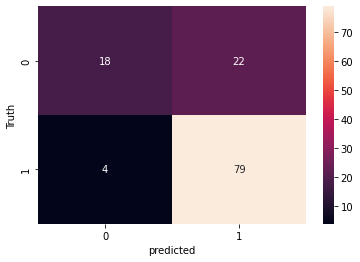

In [36]:
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# Using KNN 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=5)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [47]:
classifier.score(X_train, y_train)

1.0

In [48]:
classifier.score(X_test, y_test)

0.7073170731707317

In [49]:
#Predicting the test set result in decisiontree 
y_pred= classifier.predict(X_test)

In [50]:
Knnmatrix = confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'Truth')

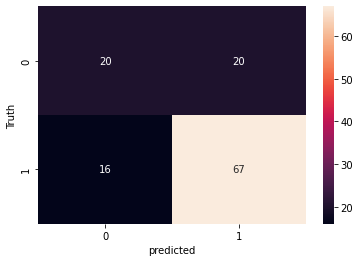

In [51]:
sns.heatmap(data=Knnmatrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# THANK YOU